In [62]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, DepthwiseConv2D
from keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [72]:
def data_generator(categories):
    for c, category in enumerate(categories):
        images = [os.path.join(dp, f) for dp, dn, filenames
                  in os.walk(category) for f in filenames
                  if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
        for img_path in images:
            img, x = get_image(img_path)
            yield np.array(x[0]), c


categories = ['/tmp/extracted_data/PetImages/Cat', '/tmp/extracted_data/PetImages/Dog']


data = []


for x, y in data_generator(categories):
    data.append({"x": x, "y": y})

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7d687cc0c360>

In [14]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats_and_dogs_filtered.zip"

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2024-12-17 18:23:32--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.63.157.23, 2600:1408:5400:292::317f, 2600:1408:5400:29a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.63.157.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>] 786.67M  38.9MB/s    in 10s     

2024-12-17 18:23:43 (78.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [824887076/824887076]



In [18]:
!echo "Downloading Kaggle CAT AND DOGS"
!curl -L -O /tmp/cats_and_dogs_filtered.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsandogs_5340.zip
!unzip -o /tmp/cats_and_dogs_filtered.zip -d /tmp/extracted_data
!rm /tmp/cats_and_dogs_filtered.zip
!ls /tmp/extracted_data

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /tmp/extracted_data/PetImages/Dog/5501.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5502.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5503.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5504.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5505.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5506.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5507.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5508.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5509.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/551.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5510.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5511.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5512.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5513.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5514.jpg  
  inflating: /tmp/extracted_data/PetImages/Dog/5515.jpg  
  inflating: /

In [19]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [21]:
def data_generator(categories):
    for c, category in enumerate(categories):
        images = [os.path.join(dp, f) for dp, dn, filenames
                  in os.walk(category) for f in filenames
                  if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
        for img_path in images:
            img, x = get_image(img_path)
            yield np.array(x[0]), c

In [22]:
random.shuffle(data)

In [31]:
import math

total_size = len(data)
train_split = 0.8
train_size = math.floor(train_split * total_size)
val_split = 0.1
val_size = math.floor(val_split * total_size)
test_size = total_size - train_size - val_size

train = data[:train_size]
val = data[train_size:train_size+val_size]
test = data[train_size+val_size:]

In [32]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[]


In [34]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(0, 2)


In [35]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 0 images from 2 categories
train / validation / test split: 0, 0, 0
training data shape:  (0,)
training labels shape:  (0, 2)


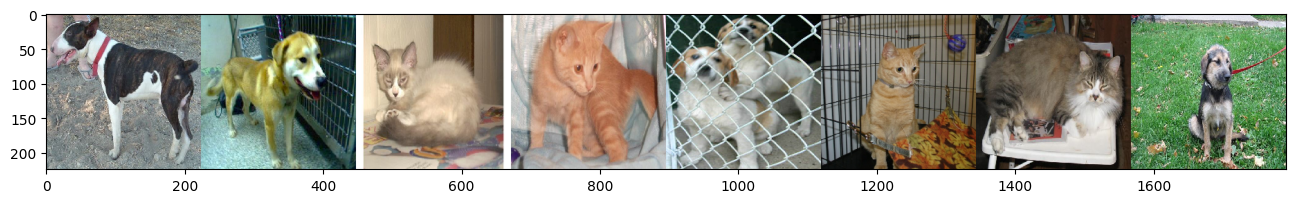

In [60]:
root = "/tmp/extracted_data/PetImages"
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
img = load_img(img_path, target_size=(224, 224))
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [63]:
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (1, 224, 224, 3)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 0, 0, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 0, 0, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 0, 0, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 0, 0, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,410 (114.88 KB)

 Trainable params: 29,410 (114.88 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1
'y' sizes: 0


In [71]:
import os
import random
import numpy as np
import keras
import math
import zipfile

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# ... (previous code) ...

def data_generator(categories):
    for c, category in enumerate(categories):
        images = [os.path.join(dp, f) for dp, dn, filenames
                  in os.walk(category) for f in filenames
                  if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
        for img_path in images:
            img, x = get_image(img_path)
            yield np.array(x[0]), c

# Define categories (assuming you have 'Cat' and 'Dog' folders)
categories = ['/tmp/extracted_data/PetImages/Cat', '/tmp/extracted_data/PetImages/Dog']

# Initialize data list
data = []

# Populate data list using the data generator
for x, y in data_generator(categories):
    data.append({"x": x, "y": y})

# ... (rest of the code) ...

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7d687cccc8b0>